# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
from pandas.core import datetools
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [11]:
df_raw.count()
pd.isnull(df_raw).sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

Answer: There are a total of 400 observations in the dataset. For some observations, there are null values (see results above from pd.isnull function).

#### Question 2. Create a summary table

In [ ]:
#function

In [12]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because the range/scale of GRE is much larger than GPA, therefore a unit of change in GRE will be larger in terms of absolute value. This also means GRE scores are much more variable than GPAs.

#### Question 4. Drop data points with missing data


In [17]:
df = df_raw.dropna(axis=0, how='any')

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Use pd.isnull(df).sum() to check for existence of null values in the dataframe. Then run the summary of the new dataframe to make sure most of the summary stats stayed intact.

In [ ]:
pd.isnull(df).sum()

In [18]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 6. Create box plots for GRE and GPA

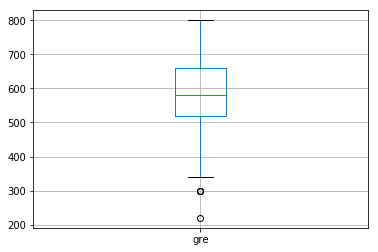

In [26]:
#boxplot 1
df.boxplot(column = 'gre')

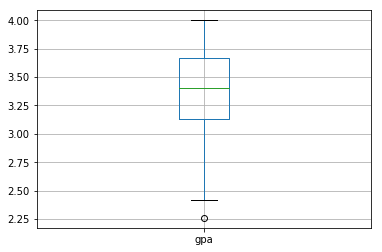

In [27]:
df.boxplot(column = 'gpa')

#### Question 7. What do this plots show?

Answer: The plots show a few outliers for both variables. Both distributions are nearly normal.

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E16CB00>]], dtype=object)

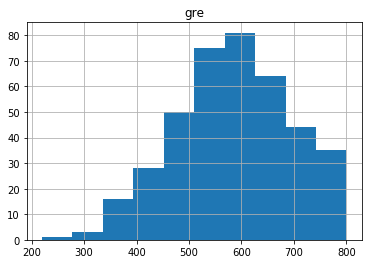

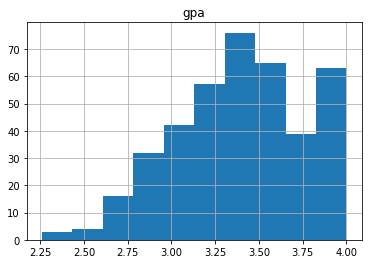

In [31]:
# plot the distribution of each variable 
df.hist(column = 'gre')
df.hist(column = 'gpa')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Technically no because both distributions are left-skewed. In practice these are good enough to be considered as "normal".

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Because these distributions are left skewed, we could perform a log transformation to adjust for the skewness.

#### Question 11. Which of our variables are potentially colinear? 

In [32]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: None of the variables is highly correlated. Of all variables, gpa and gre have the highest correlation, though the impact of the correlation is not too strong (0.38).

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer:<br>
The goal of the exploratory analysis is understand whethere there is a relation between grad school admission and prestige of undergrauate schools. <br>
First, perform descriptive analyses on the data, including summary statistics, removing nulls, plotting distributions and figuring out correlations of the variable.<br>
Second, transform any data that is skewed.<br>
Third, pick the right model for this project, say regression.<br>
Fourth, set values for X and Y in the model. In this case, Y would be the chance of being admitted. X would be the prestige score of a student's undergraduate school.<br>
Fifth, fit the model and intepret the output.

#### Question 14. What is your hypothesis? 

Answer: My hypothesis is that the prestige of undergraduate school is positively related to the chance of being admitted.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [34]:
## ref on missing values: https://chrisalbon.com/python/pandas_missing_data.html

#### 2. Bonus: Log transform the skewed data

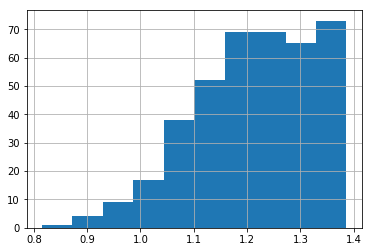

In [42]:
logdf = np.log(df.gpa)
logdf.hist()

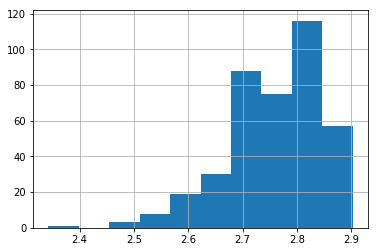

In [45]:
log2 = df['gre'].apply(np.log10)
log2.hist()

#### 3. Advanced: Impute missing data

In [47]:
df_full = df_raw.fillna(666666)
df_full.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.000000
mean,0.317500,3918.430000,3336.703975,1669.145000
std,0.466087,47039.907508,47081.055217,33333.175703
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,680.000000,3.670000,3.000000
max,1.000000,666666.000000,666666.000000,666666.000000
